In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

import pandas as pd
from scipy.spatial import cKDTree

In [2]:
df = pd.read_csv('../../dataset/m_test.csv')

print(df.columns.values)

with open('../../postprocessing/umap.npy', 'rb') as f:
    u = np.load(f)
    
assert u.shape[1] == 2, "UMAP representation has to be 2D"

['snapshot_id' 'subhalo_id' 'root_descendant_id' 'lookback' 'z'
 'stellar_age' 'fraction_disk_stars' 'mass_total' 'mass_in_rad'
 'mass_exsitu' 'snap_num_last_maj_merger' 'mass_last_maj_merger'
 'mean_merger_lookback_time' 'mean_merger_mass_ratio' 'mass'
 'lookback_time_last_maj_merger' 'exsitu' 'image_path']


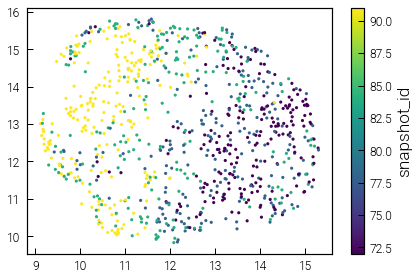

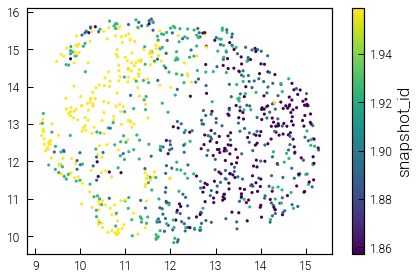

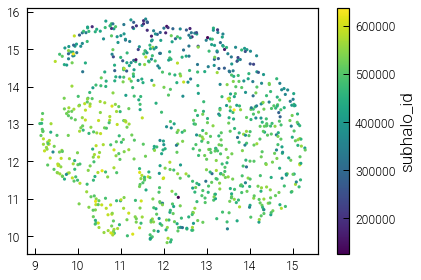

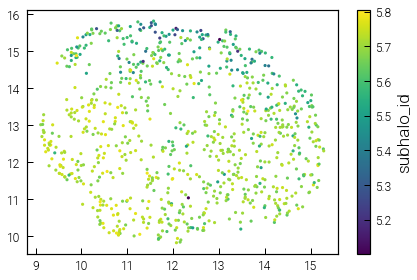

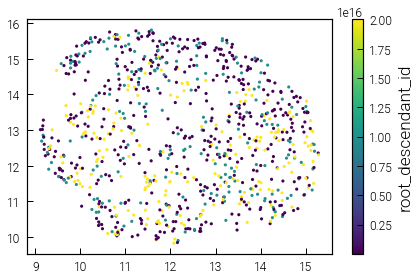

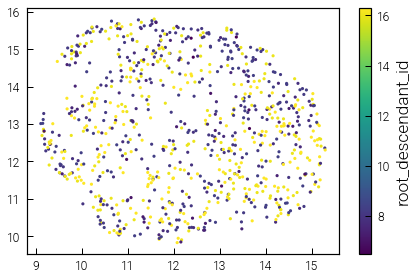

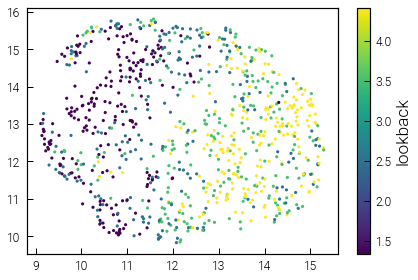

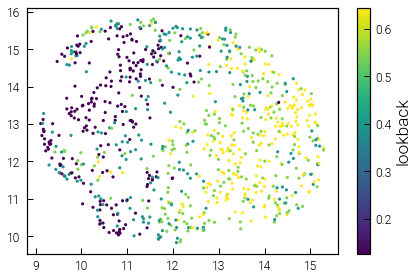

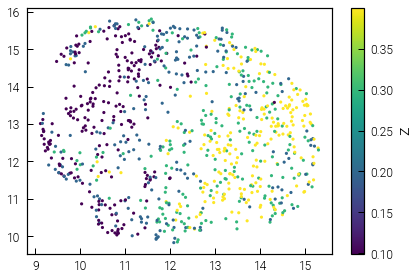

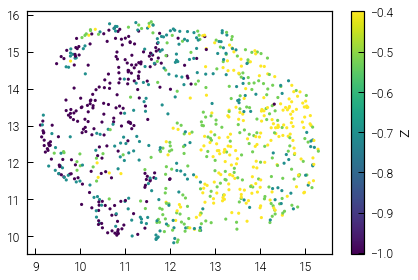

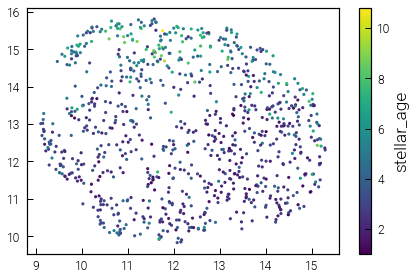

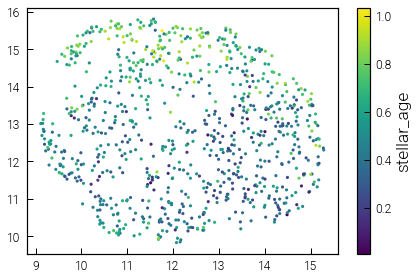

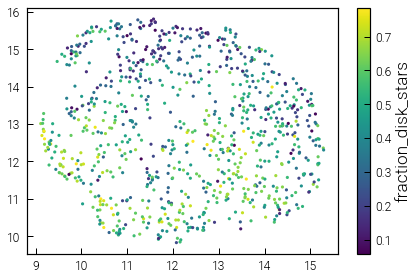

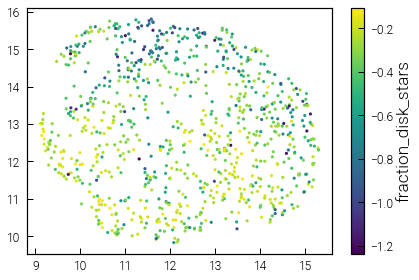

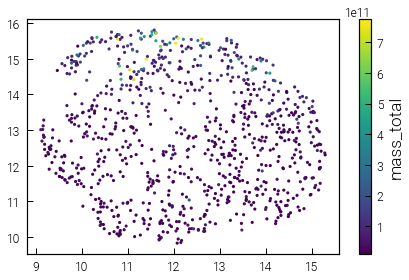

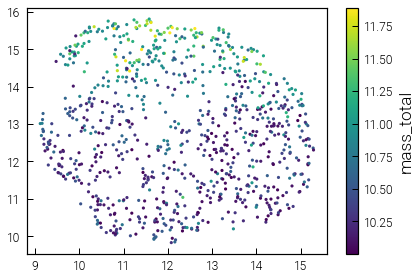

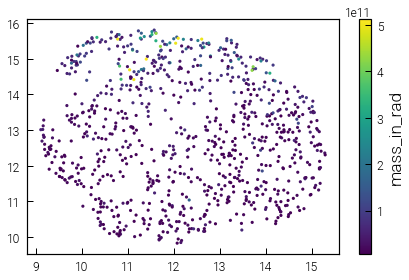

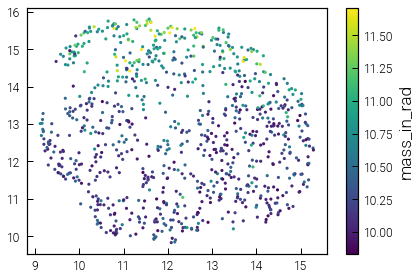

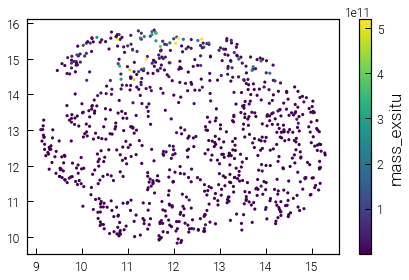

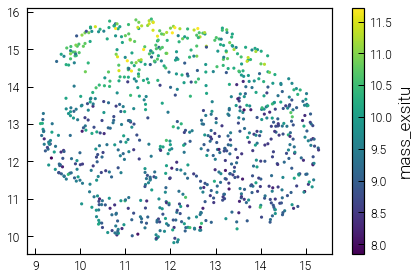

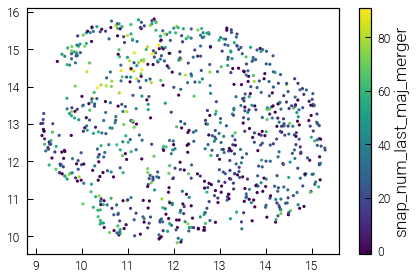

/u/leisert/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


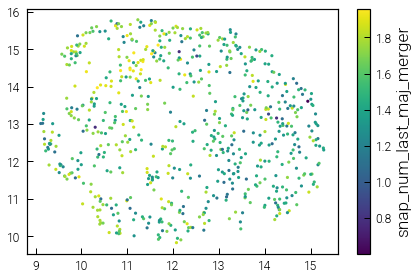

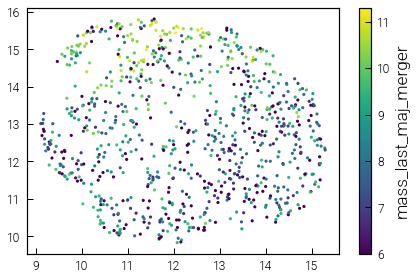

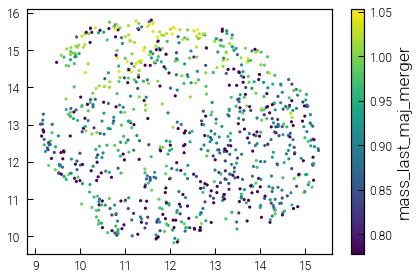

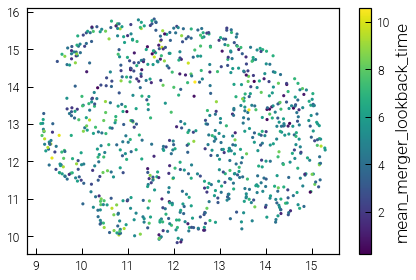

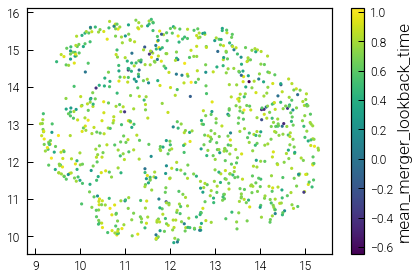

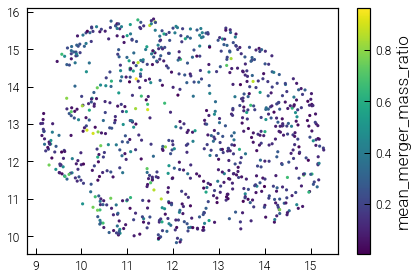

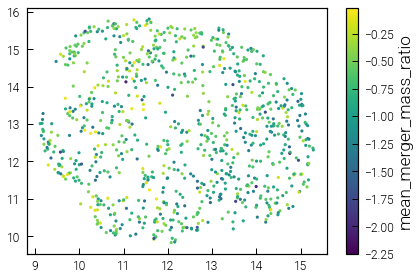

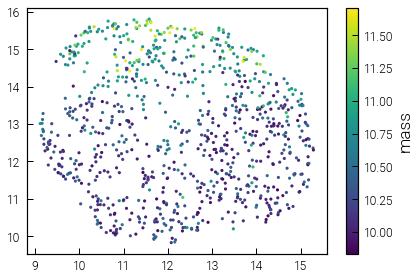

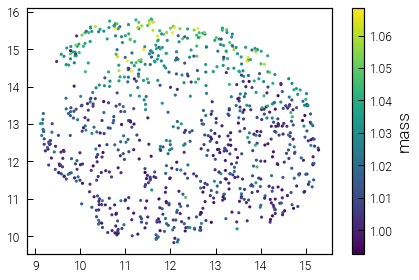

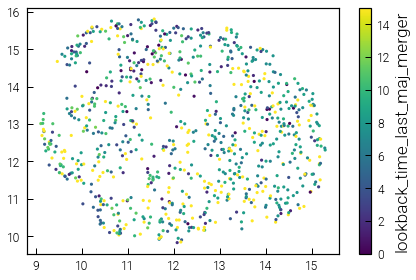

/u/leisert/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


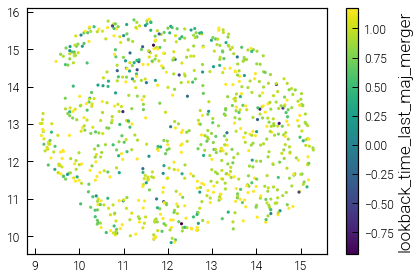

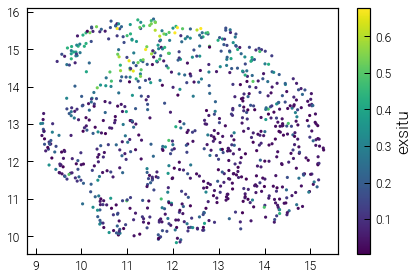

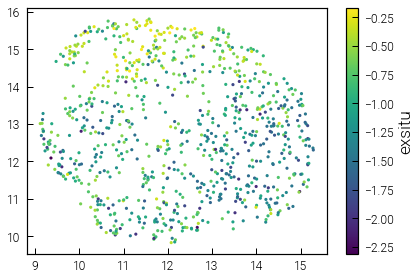

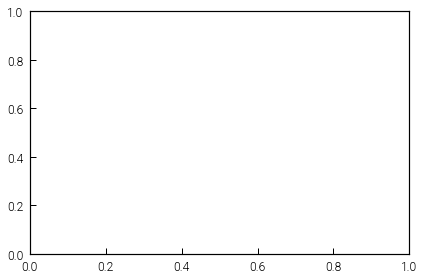

In [3]:
import matplotlib.pyplot as plt

for label in df.columns.values:
    try:
        plt.scatter(u[:,0], u[:,1], s=10, c=df[label])
        plt.colorbar(label=label)
        plt.show()
        
        plt.scatter(u[:,0], u[:,1], s=10, c=np.log10(df[label]))
        plt.colorbar(label=label)
        plt.show()
    except:
        pass


In [4]:
NUM_IMAGES_PER_SIDE = 12

u0 = np.linspace(np.min(u[:,0]), np.max(u[:,0]), num=NUM_IMAGES_PER_SIDE)
u1 = np.linspace(np.min(u[:,1]), np.max(u[:,1]), num=NUM_IMAGES_PER_SIDE)

u0v, u1v = np.meshgrid(u0, u1)
print(u0v)
print(u1v)

[[ 9.11374378  9.67508125 10.23641872 10.7977562  11.35909367 11.92043114
  12.48176861 13.04310608 13.60444355 14.16578102 14.72711849 15.28845596]
 [ 9.11374378  9.67508125 10.23641872 10.7977562  11.35909367 11.92043114
  12.48176861 13.04310608 13.60444355 14.16578102 14.72711849 15.28845596]
 [ 9.11374378  9.67508125 10.23641872 10.7977562  11.35909367 11.92043114
  12.48176861 13.04310608 13.60444355 14.16578102 14.72711849 15.28845596]
 [ 9.11374378  9.67508125 10.23641872 10.7977562  11.35909367 11.92043114
  12.48176861 13.04310608 13.60444355 14.16578102 14.72711849 15.28845596]
 [ 9.11374378  9.67508125 10.23641872 10.7977562  11.35909367 11.92043114
  12.48176861 13.04310608 13.60444355 14.16578102 14.72711849 15.28845596]
 [ 9.11374378  9.67508125 10.23641872 10.7977562  11.35909367 11.92043114
  12.48176861 13.04310608 13.60444355 14.16578102 14.72711849 15.28845596]
 [ 9.11374378  9.67508125 10.23641872 10.7977562  11.35909367 11.92043114
  12.48176861 13.04310608 13.604

In [5]:
tree = cKDTree(u, compact_nodes=False, balanced_tree=False)

filenames = np.empty_like(u0v, dtype=object)
MAX_DISTANCE = 0.2

for i in range(NUM_IMAGES_PER_SIDE):
    for j in range(NUM_IMAGES_PER_SIDE):
        distance, index = tree.query([u0v[i,j], u1v[i,j]], k=[1], p=1, workers=-1)
        
        if distance < MAX_DISTANCE:
            filenames[i,j] = "../." + df['image_path'][index].to_numpy()[0]
        else:
            filenames[i,j] = ""
        
            
print(filenames)
        

[['' '' '' '' ''
  '../../dataset_raw/TNG50-1/images/084/shalo_084-533464_v0_HSC_GRIZY.fits'
  '' '' '' '' '' '']
 ['' '' ''
  '../../dataset_raw/TNG50-1/images/091/shalo_091-513413_v3_HSC_GRIZY.fits'
  '../../dataset_raw/TNG50-1/images/084/shalo_084-535331_v3_HSC_GRIZY.fits'
  '../../dataset_raw/TNG50-1/images/084/shalo_084-451937_v3_HSC_GRIZY.fits'
  '../../dataset_raw/TNG50-1/images/078/shalo_078-473457_v1_HSC_GRIZY.fits'
  '../../dataset_raw/TNG50-1/images/078/shalo_078-520220_v0_HSC_GRIZY.fits'
  '../../dataset_raw/TNG50-1/images/072/shalo_072-436918_v3_HSC_GRIZY.fits'
  '../../dataset_raw/TNG50-1/images/078/shalo_078-413393_v3_HSC_GRIZY.fits'
  '' '']
 ['' ''
  '../../dataset_raw/TNG50-1/images/091/shalo_091-543209_v2_HSC_GRIZY.fits'
  '../../dataset_raw/TNG50-1/images/091/shalo_091-589471_v0_HSC_GRIZY.fits'
  '../../dataset_raw/TNG50-1/images/078/shalo_078-472866_v0_HSC_GRIZY.fits'
  '../../dataset_raw/TNG50-1/images/072/shalo_072-504637_v0_HSC_GRIZY.fits'
  ''
  '../../dataset_

/u/leisert/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


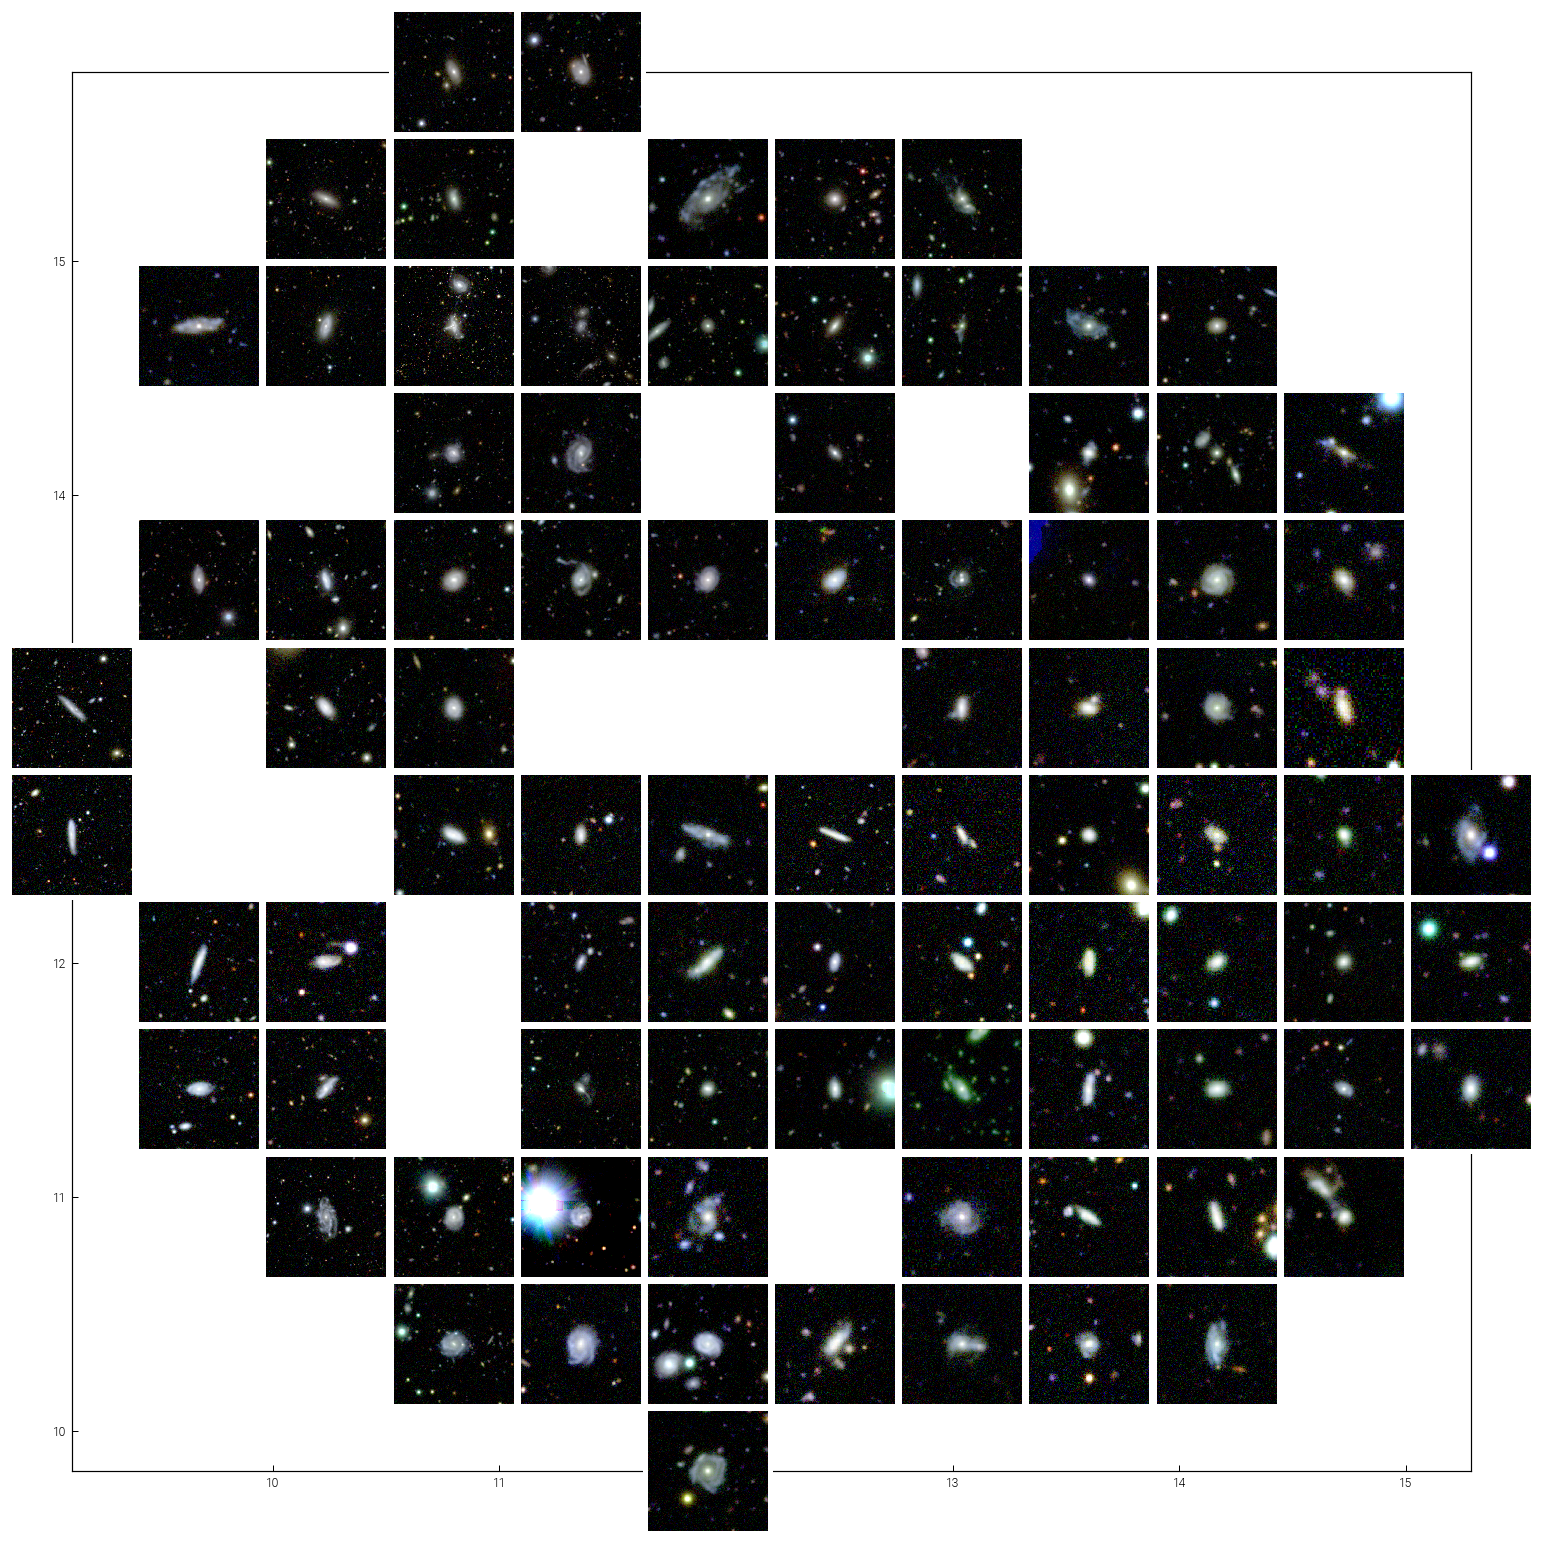

In [6]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import numpy as np
from astropy.io import fits

def load_image(filename):
    
    def get_central_crop(img, num_pixel=20):
        size = img.shape[0]
        center_coordinate = size//2
        upper = center_coordinate + num_pixel//2
        lower = center_coordinate - num_pixel//2
    
        return img[lower:upper, lower:upper]
    
    def stretch(x):
        x[x<=0] = np.nan
        x = np.log10(x)
        x[x<-7] = np.nan
        
        a_min = np.nanmedian(x)
        a_max = np.nanquantile(get_central_crop(x), 0.99)
        
        x = np.nan_to_num(x, nan=a_min, posinf=a_min, neginf=a_min)
        x = np.clip(x, a_min, a_max)
        
        x -= a_min
        x /= (a_max - a_min)
        
        return np.array(x*(2**8 - 1), dtype=np.uint8)
    
    with fits.open(filename) as hdul:
            
        G = hdul['SUBARU_HSC.G'].data
        R = hdul['SUBARU_HSC.R'].data
        I = hdul['SUBARU_HSC.I'].data
            
    G = stretch(G)
    R = stretch(R)
    I = stretch(I)

    return np.concatenate((I[...,np.newaxis],R[...,np.newaxis],G[...,np.newaxis]),axis=2)

fig, ax = plt.subplots(figsize=(20., 20.))

ax.set_xlim(u0[0], u0[-1])
ax.set_ylim(u1[0], u1[-1])

for i in range(NUM_IMAGES_PER_SIDE):
    for j in range(NUM_IMAGES_PER_SIDE):
        u0d = u0v[i,j]
        u1d = u1v[i,j]
        filename = filenames[i,j]
        
        if filename != "":
            im = load_image(filename)
            TARGET_IMAGE_SIZE = 120
            zoom_factor = TARGET_IMAGE_SIZE/im.shape[0]
            
            imagebox = OffsetImage(im, zoom=zoom_factor)
            ab = AnnotationBbox(imagebox, (u0d, u1d))
            ax.add_artist(ab)

plt.show()